In [1]:
# This Notebook loads a dataset from memory, calculates NDWI on the result set using a cloud mask, and plots the results.
# NDWI = (green - nir) / (green + nir)

In [2]:
import datacube
from datacube.storage import masking

dc = datacube.Datacube()

In [3]:
# Declare some 'constants' for the program
p = 'LE07_scene'
res = (0.0025, -0.0025)
m = ['green', 'nir', 'quality']

In [4]:
two_bands = dc.load(product = p
                    , measurements = m
                    #, time= (start, end)
                    , resolution = res
                   )

In [5]:
# Isolate all valid data in the the two bands of interest
green = two_bands.green.where(two_bands.green != two_bands.green.attrs['nodata'])
nir = two_bands.nir.where(two_bands.nir != two_bands.nir.attrs['nodata'])
green.plot(col='time'
          , col_wrap = 2
          , size = 5)
nir.plot(col='time'
          , col_wrap = 2
          , size = 5)

In [6]:
# Prepare the pixel quality band as a cloud mask
cloud_free = masking.make_mask(two_bands, cloud=False).quality

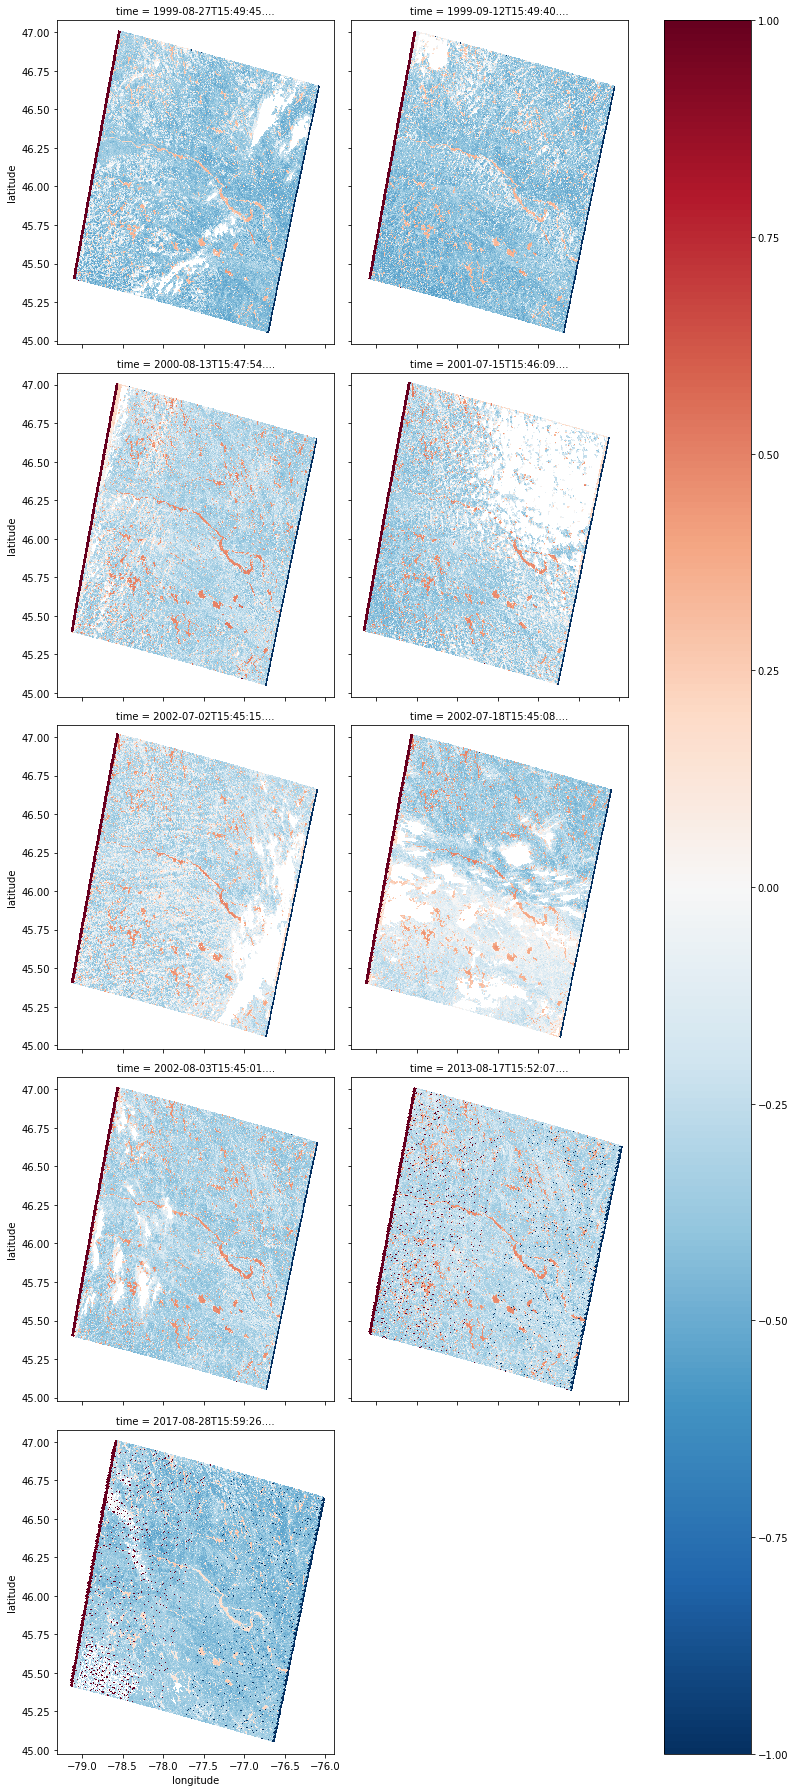

In [8]:
#Calculate and plot the NDVI
NDWI = ((green - nir) / (green + nir)).where(cloud_free)
NDWI.plot(col='time'
          , col_wrap = 2
          , size = 5)